# IT 402
## Assignment 2 - Single Layer Perceptron

### Name: Niraj Nandish
### Roll no.: 191IT234

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('Heart_Dataset.xlsx', header=None, sheet_name='Sheet1')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


In [3]:
train_df, test_df = train_test_split(df, test_size=0.2)

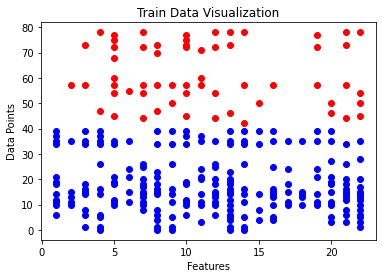

In [4]:
for i, row in train_df.iterrows():
    row = train_df.loc[i]
    x = row.index[row == 1].tolist()[1:]
    y = [i for _ in x]
    col = "b" if (row.tolist()[0] == 1) else "r"
    plt.scatter(x, y, color=col)
    plt.xlabel("Features")
    plt.ylabel("Data Points")
    plt.title("Train Data Visualization")

plt.show()

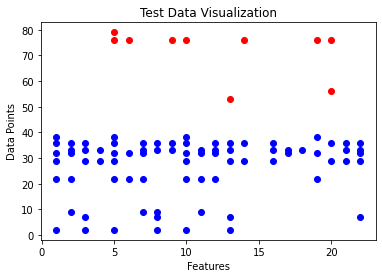

In [14]:
for i, row in test_df.iterrows():
    row = test_df.loc[i]
    x = row.index[row == 1].tolist()[1:]
    y = [i for _ in x]
    col = "b" if (row.tolist()[0] == 1) else "r"
    plt.scatter(x, y, color=col)
    plt.xlabel("Features")
    plt.ylabel("Data Points")
    plt.title("Test Data Visualization")

plt.show()

In [6]:
class SLP:
    def __init__(self, alpha):
        self.alpha = alpha
        self.weights = np.append(-0.5, np.random.uniform(0.5, 1, 22))

    def predict(self, row):
        activation = self.weights[0]
        for j in range(len(row) - 1):
            activation += self.weights[j + 1] * row[j]

        return 1.0 if activation >= 0.0 else 0.0

    def validate(self, X, y):
        correct_pred = 0

        for row_index in range(len(X)):
            pred = self.predict(X[row_index])
            error = y[row_index] - pred
            correct_pred += 1 if error == 0 else 0

        return 100 * correct_pred / len(X)

    def fit(self, X, y, test_X=None, test_y=None, epochs=100, display=True):
        for n in range(epochs):
            correct_pred = 0

            for i in range(len(X)):
                pred = self.predict(X[i])
                error = y[i] - pred
                correct_pred += 1 if error == 0 else 0

                self.weights[0] = self.weights[0] + (self.alpha * error)

                for j in range(len(X[i]) - 1):
                    self.weights[j + 1] = self.weights[j + 1] + (
                        self.alpha * error * X[i][j]
                    )

            train_accuracy = 100 * correct_pred / len(X)

            if test_X is not None and test_y is not None:
                val_accuracy = self.validate(test_X, test_y)
            else:
                val_accuracy = 0.0

            if display and (n + 1) % 5 == 0:
                print(
                    f"Epoch: {n + 1} \t Train Accuracy: {train_accuracy:.3f} % \t Validation Accuracy: {val_accuracy:.3f} %"
                )


In [7]:
train_data = train_df.to_numpy()
X = train_data.T[1:].T
y = train_data.T[0].T


In [8]:
test_data = test_df.to_numpy()
test_X = test_data.T[1:].T
test_y = test_data.T[0].T


In [9]:
model = SLP(0.01)
model.fit(X, y, test_X, test_y)


Epoch: 5 	 Train Accuracy: 68.750 % 	 Validation Accuracy: 81.250 %
Epoch: 10 	 Train Accuracy: 78.125 % 	 Validation Accuracy: 75.000 %
Epoch: 15 	 Train Accuracy: 79.688 % 	 Validation Accuracy: 75.000 %
Epoch: 20 	 Train Accuracy: 78.125 % 	 Validation Accuracy: 75.000 %
Epoch: 25 	 Train Accuracy: 81.250 % 	 Validation Accuracy: 75.000 %
Epoch: 30 	 Train Accuracy: 79.688 % 	 Validation Accuracy: 75.000 %
Epoch: 35 	 Train Accuracy: 79.688 % 	 Validation Accuracy: 75.000 %
Epoch: 40 	 Train Accuracy: 84.375 % 	 Validation Accuracy: 75.000 %
Epoch: 45 	 Train Accuracy: 84.375 % 	 Validation Accuracy: 68.750 %
Epoch: 50 	 Train Accuracy: 87.500 % 	 Validation Accuracy: 68.750 %
Epoch: 55 	 Train Accuracy: 85.938 % 	 Validation Accuracy: 68.750 %
Epoch: 60 	 Train Accuracy: 90.625 % 	 Validation Accuracy: 62.500 %
Epoch: 65 	 Train Accuracy: 85.938 % 	 Validation Accuracy: 62.500 %
Epoch: 70 	 Train Accuracy: 90.625 % 	 Validation Accuracy: 62.500 %
Epoch: 75 	 Train Accuracy: 92.188 

In [10]:
model = SLP(0.001)
model.fit(X, y, test_X, test_y)


Epoch: 5 	 Train Accuracy: 64.062 % 	 Validation Accuracy: 68.750 %
Epoch: 10 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 15 	 Train Accuracy: 64.062 % 	 Validation Accuracy: 68.750 %
Epoch: 20 	 Train Accuracy: 64.062 % 	 Validation Accuracy: 68.750 %
Epoch: 25 	 Train Accuracy: 65.625 % 	 Validation Accuracy: 68.750 %
Epoch: 30 	 Train Accuracy: 67.188 % 	 Validation Accuracy: 75.000 %
Epoch: 35 	 Train Accuracy: 67.188 % 	 Validation Accuracy: 75.000 %
Epoch: 40 	 Train Accuracy: 67.188 % 	 Validation Accuracy: 75.000 %
Epoch: 45 	 Train Accuracy: 71.875 % 	 Validation Accuracy: 75.000 %
Epoch: 50 	 Train Accuracy: 71.875 % 	 Validation Accuracy: 75.000 %
Epoch: 55 	 Train Accuracy: 75.000 % 	 Validation Accuracy: 81.250 %
Epoch: 60 	 Train Accuracy: 76.562 % 	 Validation Accuracy: 87.500 %
Epoch: 65 	 Train Accuracy: 76.562 % 	 Validation Accuracy: 87.500 %
Epoch: 70 	 Train Accuracy: 75.000 % 	 Validation Accuracy: 87.500 %
Epoch: 75 	 Train Accuracy: 76.562 

In [11]:
model = SLP(0.0001)
model.fit(X, y, test_X, test_y)


Epoch: 5 	 Train Accuracy: 64.062 % 	 Validation Accuracy: 68.750 %
Epoch: 10 	 Train Accuracy: 64.062 % 	 Validation Accuracy: 68.750 %
Epoch: 15 	 Train Accuracy: 64.062 % 	 Validation Accuracy: 68.750 %
Epoch: 20 	 Train Accuracy: 64.062 % 	 Validation Accuracy: 68.750 %
Epoch: 25 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 30 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 35 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 40 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 45 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 50 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 55 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 60 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 65 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 70 	 Train Accuracy: 62.500 % 	 Validation Accuracy: 68.750 %
Epoch: 75 	 Train Accuracy: 62.500 

In [12]:
def k_fold_cross_validation(n=5):
    random_df = train_df.sample(frac=1)
    folds = []
    acc_scores = []
    div = int(len(train_df) / n)

    for fold_index in range(n):
        folds.append(random_df[fold_index * div : (fold_index + 1) * div])

    for i in range(n):
        train_data = pd.concat((folds[:i] + folds[i + 1 :]), axis=0)
        test_data = folds[i]

        x_train = train_data.loc[:, 1:].to_numpy()
        x_test = test_data.loc[:, 1:].to_numpy()
        y_train = train_data.loc[:, 0].to_numpy()
        y_test = test_data.loc[:, 0].to_numpy()

        model = SLP(0.01)
        model.fit(x_train, y_train, display=False)

        acc_score = model.validate(x_test, y_test)
        print(f"Accuracy = {acc_score:.3f} %")
        acc_scores.append(acc_score)

    return sum(acc_scores) / len(acc_scores)


In [13]:
print(f'\nAverage Accuracy = {k_fold_cross_validation():.3f} %')

Accuracy = 83.333 %
Accuracy = 75.000 %
Accuracy = 83.333 %
Accuracy = 33.333 %
Accuracy = 83.333 %

Average Accuracy = 71.667 %
